Esse mini-projeto tem como objetivo para classificar carteiras de crédito dos bancos brasileiros usando dados do Banco Central.

Aqui vamos explorar os dados do mês de junho/2022.

Começamos com os imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.cluster import KMeans

Depois de analizar um pouco o arquivos, descobrimos como importá-lo:

In [2]:
estban = pd.read_csv("202206_ESTBAN.CSV"
                  , sep=';'
                  , skiprows=[0,1]
                  , encoding="latin1"
                  )

estban.head()

,#DATA_BASE,UF,CODMUN,MUNICIPIO,CNPJ,NOME_INSTITUICAO,AGEN_ESPERADAS,AGEN_PROCESSADAS,VERBETE_110_ENCAIXE,VERBETE_111_CAIXA,...,VERBETE_481_IOF + VERBETE_482_CONTRIBUICOES_PREVIDENCIARIAS + VERBETE_483_TRIBUTOS_ESTAD_E_MUNICIPAIS + VERBETE_484_TRIBUTOS_FEDERAIS + VERBETE_485_FGTS + VERBETE_487_DEMAIS_RECEBIMENTOS,VERBETE_486_PIS/PASEP,VERBETE_490_CHEQUES_ADMINISTRATIVOS + VERBETE_500_OUTRAS_OBRIGACOES,VERBETE_610_PATRIMONIO_LIQUIDO,VERBETE_710_CONTAS_DE_RESULTADO,VERBETE_711_CONTAS_CREDORAS,VERBETE_712_CONTAS_DEVEDORAS,VERBETE_800_CONTAS_DE_COMPENSACAO,VERBETE_899_TOTAL_DO_PASSIVO,CODMUN_IBGE
0,202206,AC,5184,MANOEL URBANO,360305,CAIXA ECONOMICA FEDERAL,1,1,1030661.0,1030661.0,...,25506.0,0.0,36562.0,0.0,1142461.0,1931929.0,-789467.0,50005862.0,63928877.0,1200344.0
1,202206,AC,9465,ASSIS BRASIL,360305,CAIXA ECONOMICA FEDERAL,1,1,1054181.0,1054181.0,...,2712.0,0.0,12417.0,0.0,604009.0,1019371.0,-415362.0,49039232.0,55088997.0,1200054.0
2,202206,AC,15978,FEIJO,360305,CAIXA ECONOMICA FEDERAL,1,1,2807722.0,2807722.0,...,19907.0,0.0,295183.0,0.0,2390130.0,3408460.0,-1018330.0,78995901.0,98109883.0,1200302.0
3,202206,AC,15978,FEIJO,4902979,BCO DA AMAZONIA S.A.,1,1,225617.0,225617.0,...,553.0,0.0,37436.0,0.0,501451.0,809913.0,-308462.0,71906968.0,83492716.0,1200302.0
4,202206,AC,18690,XAPURI,4902979,BCO DA AMAZONIA S.A.,1,1,292732.0,292732.0,...,5424.0,0.0,82135.0,0.0,1023025.0,1287317.0,-264292.0,80337120.0,105840490.0,1200708.0


Estamos interassados apenas nos dados de crédito
Lendo os metadados no site do Banco Central, esses são os verbetes 160-179.

In [3]:
credito = estban.filter(regex = r"NOME_INSTITUICAO|(VERBETE_1(6|7))", axis = 1)

Esse arquivo possui os dados por município.
Queremos os dados nacionais por banco.

In [4]:
credito_nacional = credito.groupby(by=["NOME_INSTITUICAO"]).sum()
credito_nacional.head()

,VERBETE_160_OPERACOES_DE_CREDITO,VERBETE_161_EMPRES_E_TIT_DESCONTADOS,VERBETE_162_FINANCIAMENTOS,VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST,VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST,VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ,VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ,VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS,VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS,VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO,VERBETE_172_OUTROS_CREDITOS,VERBETE_173_CREDITOS_EM_LIQUIDACAO,VERBETE_174_PROV_P/_OPER_CREDITOS,VERBETE_176_OPERACOES_ESPECIAIS
NOME_INSTITUICAO,,,,,,,,,,,,,,
BANCO BARI S.A.,7.734152e+08,6.962544e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2.911276e+07,0.0,6.999021e+07,0.0,-2.194219e+07,0.0
BANCO BRADESCARD,1.160680e+10,3.344005e+09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.809436e+09,-336908840.0,-1.209737e+09,0.0
BANCO BTG PACTUAL S.A.,6.976233e+10,3.356101e+10,3.497663e+09,4.317693e+09,0.0,0.0,0.0,0.0,4.432317e+09,0.0,2.538216e+10,0.0,-1.428507e+09,0.0
BANCO CIFRA,1.462117e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.462117e+08,0.0,0.000000e+00,0.0
BANCO FINAXIS,9.830110e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.830110e+06,0.0,0.000000e+00,0.0


Os nomes dos verbetes são muito longos, vamos usar só os dígitos.
Mas vamos salvar os nomes originais para ficar mais fácil de compreender depois.

In [5]:
verbetes = credito_nacional.columns

In [6]:
def get_num(col):
  match = re.search(r"1(6|7)\d", col)
  return match.group(0)

credito_nacional = credito_nacional.rename(columns=get_num)

credito_nacional.head()

,160,161,162,163,164,165,166,167,169,171,172,173,174,176
NOME_INSTITUICAO,,,,,,,,,,,,,,
BANCO BARI S.A.,7.734152e+08,6.962544e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,2.911276e+07,0.0,6.999021e+07,0.0,-2.194219e+07,0.0
BANCO BRADESCARD,1.160680e+10,3.344005e+09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.809436e+09,-336908840.0,-1.209737e+09,0.0
BANCO BTG PACTUAL S.A.,6.976233e+10,3.356101e+10,3.497663e+09,4.317693e+09,0.0,0.0,0.0,0.0,4.432317e+09,0.0,2.538216e+10,0.0,-1.428507e+09,0.0
BANCO CIFRA,1.462117e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.462117e+08,0.0,0.000000e+00,0.0
BANCO FINAXIS,9.830110e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,9.830110e+06,0.0,0.000000e+00,0.0


Os metadados dão a entender que o verbete 160 é a soma dos demais, mas não explicita isso. Vale a pena verificar:

In [7]:
credito_nao_160 = credito_nacional.filter(regex = r"1(6[1-9]|7)", axis = 1)

somas = credito_nao_160.sum(axis=1)

check = abs(somas - credito_nacional["160"])

check.max()

47.0

Verificamos que o valor máximo de `check` é 47 reais, claramente um pequeno erro de ponto flutuante dado a ordem de grandeza dos nossos dados.

Vamos manter os dados ordenados por volume total para ser mais fácil de interpretar:

In [8]:
credito_nacional = credito_nacional.sort_values(by = "160")

print(credito_nacional.to_string())

                                                 160           161           162           163  164  165  166           167           169           171           172           173           174  176
NOME_INSTITUICAO                                                                                                                                                                                      
BCO WESTERN UNION                       2.258030e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.000000e+00  0.000000e+00  0.000000e+00  2.258030e+05  0.000000e+00  0.000000e+00  0.0
SOCIAL BANK S/A                         3.717150e+06  2.067052e+06  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.000000e+00  0.000000e+00  0.000000e+00  1.764385e+06  0.000000e+00 -1.142870e+05  0.0
BANCO FINAXIS                           9.830110e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.0  0.0  0.0  0.000000e+00  0.000000e+00  0.000000e+00  9.830110e+06  0.000000e+00  0.000000e+00  0.0
BCO C

Vemos que o volume de crédito varia de 200 mil a quase 1 trilhão de reais.

Mas queremos classificar as carteiras de crédito, ou seja, as proporções nos diferentes verbetes.

In [9]:
carteiras = credito_nacional.filter(regex = r"1(6[1-9]|7)", axis = 1).div(credito_nacional["160"], axis=0)

carteiras.head()

,161,162,163,164,165,166,167,169,171,172,173,174,176
NOME_INSTITUICAO,,,,,,,,,,,,,
BCO WESTERN UNION,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
SOCIAL BANK S/A,0.556085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474661,0.0,-0.030746,0.0
BANCO FINAXIS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
BCO CEDULA S.A.,0.129850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.870994,0.0,-0.000844,0.0
BCO B3 S.A.,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0


O plano agora é agrupar os bancos por carteiras semelhantes.
Para isso vamos usar o kmeans.
É difícil decidir quantos grupos queremos. Uma primeira euristica é o "método dos cotovelos".

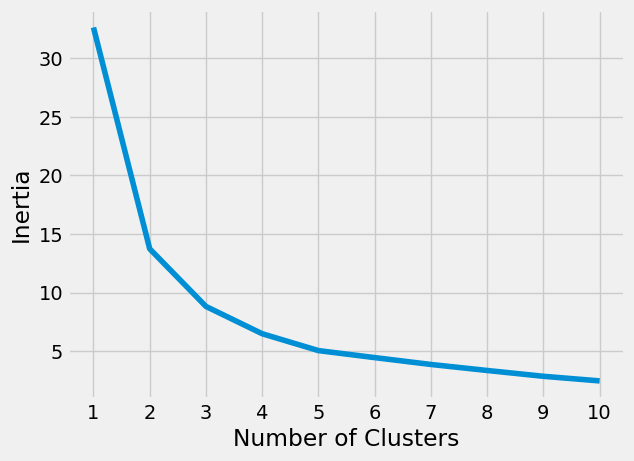

In [10]:
inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(carteiras)
  inertias.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), inertias)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Olhando para o gráfico, o número de clusters deveria ser 3.
Vamos ver o que isso nos dá.
Escolhemos uma seed para a aleatoriade para o resultado ser reproduzível.

In [18]:
seed = 131

kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(carteiras)

centers_3 = pd.DataFrame(kmeans.cluster_centers_.round(1), columns= carteiras.columns)
centers_3

,161,162,163,164,165,166,167,169,171,172,173,174,176
0,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.3,-0.0,-0.0,0.0
1,0.1,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.9,-0.0,-0.0,0.0
2,0.8,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.2,-0.0,-0.0,0.0


O que significa cada coluna mesmo?

In [12]:
verbetes

Index(['VERBETE_160_OPERACOES_DE_CREDITO',
       'VERBETE_161_EMPRES_E_TIT_DESCONTADOS', 'VERBETE_162_FINANCIAMENTOS',
       'VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST',
       'VERBETE_164_FIN_RURAIS_PECUAR_CUST/INVEST',
       'VERBETE_165_FIN_RURAIS_AGRICUL_COMERCIALIZ',
       'VERBETE_166_FIN_RURAIS_PECUARIA_COMERCIALIZ',
       'VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS+VERBETE_168_RENDAS_A_APROPRIAR_FINANC_RURAIS_AGROINDUSTRIAIS',
       'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS',
       'VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO',
       'VERBETE_172_OUTROS_CREDITOS', 'VERBETE_173_CREDITOS_EM_LIQUIDACAO',
       'VERBETE_174_PROV_P/_OPER_CREDITOS', 'VERBETE_176_OPERACOES_ESPECIAIS'],
      dtype='object')

Esses clusteres não parecem com o esperado. 
Créditos imobiliários não apareceram e os créditos para agro apareceram com peso muito pequeno. 
Talvez realmente poucos bancos trabalham nessas áreas, mas será o caso?

In [13]:
carteiras.max()

161    1.014750
162    0.918849
163    0.714878
164    0.000000
165    0.000000
166    0.000000
167    0.294184
169    0.702397
171    0.113250
172    1.010739
173    0.000000
174    0.000000
176    0.000000
dtype: float64

Muitas colunas são nulas mesmo, mas financiamentos imobiliários e agro de fato são relevantes para alguns bancos. Talvez sejam poucos, e por isso 3 grupos não são capazes de classificálos.

Vamos olhar para os créditos imobiliários

In [14]:
print(carteiras.sort_values(by = "169").round(2).to_string())

                                         161   162   163  164  165  166   167   169   171   172   173   174  176
NOME_INSTITUICAO                                                                                                
BCO WESTERN UNION                       0.00  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  1.00  0.00  0.00  0.0
DEUTSCHE BANK S.A.BCO ALEMAO            0.13  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.89  0.00 -0.02  0.0
BCO AGIBANK S.A.                        0.99  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.01  0.04  0.00 -0.05  0.0
BCO MIZUHO S.A.                         0.13  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.02  0.85  0.00 -0.00  0.0
PARANA BCO S.A.                         0.99  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.02  0.00 -0.02  0.0
BCO BV S.A.                             0.35  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.77 -0.01 -0.11  0.0
BCO FIBRA S.A.                          0.31  0.17  0.03  0.0  0.0  0.0  0.00  0.00  0.00  0.51 

Certamente a Caixa é um outlier. E temos ainda alguns outros poucos bancos que também investem em crédito imobiliário.

Agora vamos para o agro:

In [15]:
print(carteiras.sort_values(by = "163").round(2).to_string())

                                         161   162   163  164  165  166   167   169   171   172   173   174  176
NOME_INSTITUICAO                                                                                                
BCO WESTERN UNION                       0.00  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  1.00  0.00  0.00  0.0
BCO BV S.A.                             0.35  0.00  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.77 -0.01 -0.11  0.0
BCO PINE S.A.                           0.55  0.11  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.39  0.00 -0.05  0.0
BCO CARGILL S.A.                        0.00  0.17  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.83  0.00 -0.00  0.0
BCO INDUSTRIAL DO BRASIL S.A.           0.47  0.12  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.42  0.00 -0.01  0.0
BCO SUMITOMO MITSUI BRASIL S.A.         0.44  0.05  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.52  0.00 -0.00  0.0
BCO DIGIMAIS S.A.                       0.06  0.92  0.00  0.0  0.0  0.0  0.00  0.00  0.00  0.15 

O Banco John Deere também é um outlier. E também temos alguns bancos que investem em agro.

O método do cotovelo é apenas uma heurística, que não deu resultados bons no nosso caso. Vamos remover os dois outliers e procurar mais grupos.

In [16]:
carteiras_bulk = carteiras.drop(["CAIXA ECONOMICA FEDERAL","BANCO JOHN DEERE S.A."])